In [1]:
import sys
sys.path.append('..')
%load_ext autoreload
%autoreload 2
from targets.density_estimation_target import *
from models import BinaryClassifier
import torch
import matplotlib.pyplot as plt

In [2]:
num_samples = 50000
target =Dimension1()
target_samples_1 = target.sample(num_samples)
target_samples_0 = target.sample(num_samples) + 10*torch.ones_like(target_samples_1)

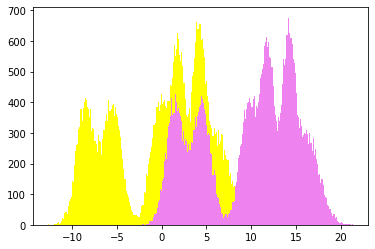

In [3]:
plt.hist(target_samples_1.numpy(), bins = 200, color = 'yellow')
plt.hist(target_samples_0.numpy(), bins = 200, color = 'violet')
plt.show()

In [4]:
binary_classif = BinaryClassifier(target_samples_1, target_samples_0, [64,64,64])
binary_classif.train(100)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:15<00:00,  1.35s/it, loss = 0.651406]


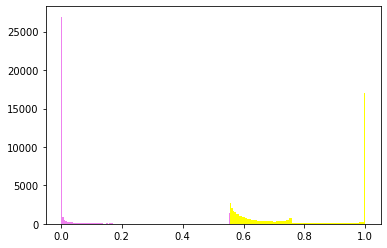

In [20]:
### Print histogram of predicted probabilities calculated on dataset ###
with torch.no_grad():
    sigmoid = torch.sigmoid
    prediction_0_samples = sigmoid(binary_classif.logit_r(target_samples_0))
    plt.hist(prediction_0_samples.numpy(),bins =200, color = 'violet')
    prediction_1_samples = sigmoid(binary_classif.logit_r(target_samples_1))
    plt.hist(prediction_1_samples.numpy(),bins =200, color = 'yellow')

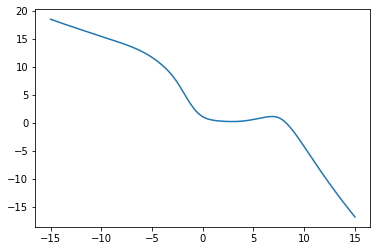

In [25]:
with torch.no_grad():
    linspace = torch.linspace(-15,15,200)
    log_density_ratio = binary_classif.logit_r(linspace.unsqueeze(-1))
    plt.plot(linspace, log_density_ratio.numpy())